# Normative Uncertainty in IAMs

#### Testing the hypervolumes for convergence

- First generate reference set from all seeds (or islands of MM Borg MOEA)
- Then generate hypervolumes for each seed (or island) against reference set
- Plot the hypervolumes for each seed (or island) against number of function evaluations

In [4]:
# This code creates a reference set from the different seeds

# NOTE: For MMBorg archives, run the script to convert it to the format recognized by older code with ema-workbench.
# Example 
# python borg_archive_processor.py     --archive /Volumes/justicedrive/NU_data_20_Oct/PRIORITARIAN_200000_ref5_42/mm_intermediate.zip     --base-name PRIORITARIAN_200000_ref5_42     --step 10000

from solvers.convergence.hypervolume import get_global_reference_set, calculate_hypervolume_from_archives
import multiprocessing
# Suppress warnings
import warnings

from justice.util.enumerations import WelfareFunction, SSP
from justice.util.visualizer import plot_hypervolume

warnings.filterwarnings("ignore")

base_path = "data/temporary/NU_DATA/mmBorg/" # Change this to your path

swf = WelfareFunction.PRIORITARIAN
nfe = 100_000
ssp = SSP.SSP4
ssp_ref = 5
path = f"{base_path}/{swf.value[1]}_{str(ssp).split('.')[1]}"


print(f"Loading data from {path}...")

list_of_objectives = [
    "welfare",
    "fraction_above_threshold",
]
data_path = path 

direction_of_optimization = ["min", "min"] #, "max", "max"

get_global_reference_set(
    list_of_objectives=list_of_objectives,
    data_path=data_path,
    #file_name=None,
    swf=[
        swf.value[1],
    ],
    nfe=str(nfe), # Ran for 50k number of function evaluations

    # Setting the same epsilon values as optimization process  (see analysis/analyzer.py)
    epsilons=[
        0.00001,
        0.001,
    ],


    direction_of_optimization=direction_of_optimization,
    output_data_path=path,
    saving=True,
)




Loading data from data/temporary/NU_DATA/mmBorg//PRIORITARIAN_SSP4...
Loading list of files
Loading archives for:  PRIORITARIAN
Filename:  mapping
Filename:  PRIORITARIAN_100000_ref5_42_2.tar.gz
Matching file: PRIORITARIAN_100000_ref5_42_2.tar.gz
Loading archives from: PRIORITARIAN_100000_ref5_42_2.tar.gz
Max key: 100000
Number of rows in archive: 2
Archives loaded for: PRIORITARIAN_100000_ref5_42_2.tar.gz
Filename:  Prioritarian_hypervolume_plot.svg
Filename:  PRIORITARIAN_100000_ref5_42_0.tar.gz
Matching file: PRIORITARIAN_100000_ref5_42_0.tar.gz
Loading archives from: PRIORITARIAN_100000_ref5_42_0.tar.gz
Max key: 100000
Number of rows in archive: 2
Archives loaded for: PRIORITARIAN_100000_ref5_42_0.tar.gz
Filename:  .DS_Store
Filename:  ref_SSP4_Temperature_Regret_idx1
Filename:  PRIORITARIAN_100000_ref5_42_4.tar.gz
Matching file: PRIORITARIAN_100000_ref5_42_4.tar.gz
Loading archives from: PRIORITARIAN_100000_ref5_42_4.tar.gz
Max key: 100000
Number of rows in archive: 2
Archives loa

ReadError: file could not be opened successfully

Computing the Hypervolume for the reference set

In [ ]:
## This block computes the Hypervolume for the reference set

filenames = [


    # Loading Archives for the different seeds  Borg
    f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_0.tar.gz", 
    f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_1.tar.gz",
    f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_2.tar.gz",
    f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_3.tar.gz",
    f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_4.tar.gz",


]

reference_set = f"{swf.value[1]}_reference_set.csv"
# reference_set =  "final_archive/100000.csv"

with multiprocessing.Pool() as pool:
    # Enumerate through the filenames
    for filename in filenames:
        scores = calculate_hypervolume_from_archives(
            list_of_objectives=list_of_objectives,
            direction_of_optimization=direction_of_optimization,
            input_data_path=data_path,
            file_name=filename,
            output_data_path=path,
            saving=True,
            global_reference_set=True,
            global_reference_set_path=path,
            global_reference_set_file=reference_set,
            pool=pool,
          )  # NOTE: Change this according to the PF refset
        



Loading archives for PRIORITARIAN_200000_ref5_42_0.tar.gz
Archives loaded
list_of_archives:  (45, 2)
reference_set (2, 2)
type of reference_set <class 'numpy.ndarray'>
nfes: 
 [100, 10000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 20000, 200000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
Computing hypervolume for  PRIORITARIAN_200000_ref5_42_0.tar.gz
Time taken for Hypervolume Calculation: 2.921 seconds
data/temporary/NU_DATA/mmBorg/PRIORITARIAN_SSP4/200k/PRIORITARIAN_200000_ref5_42_0_hv.csv
Loading archives for PRIORITARIAN_200000_ref5_42_1.tar.gz
Archives loaded
list_of_archives:  (56, 2)
reference_set (2, 2)
type of reference_set <class 'numpy.ndarray'>
nfes: 
 [100, 10000, 100000, 110000, 120000, 130000, 140000, 150000, 160000, 170000, 180000, 190000, 20000, 200000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
Computing hypervolume for  PRIORITARIAN_200000_ref5_42_1.tar.gz
Time taken for Hypervolume Calculation: 0.003 seconds
data/tem

Plotting the Hypervolumes for each seed (or island) against number of function evaluations

In [ ]:
input_data_path_list = {
    
   swf.value[1]: [
        f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_0_hv.csv",
        f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_1_hv.csv",
        f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_2_hv.csv",
        f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_3_hv.csv",
        f"{swf.value[1]}_{nfe}_ref{ssp_ref}_42_4_hv.csv",
    ],
}


fig = plot_hypervolume(
    path_to_data=path,
    path_to_output=path,
    input_data=input_data_path_list,
    yaxis_upper_limit=1.0,
    width=1000,
    height=800,
    fontsize=20,
    saving=True,
)

fig.show()

## Launch the Mapping Script in Util
```
python justice/util/postprocessing_for_regret_calculations.py data/temporary/NU_DATA/mmBorg/ UTILITARIAN SSP2
```
- This reevaluates all the Pareto optimal policy candidates to compute the 90th percentile regret values for welfare (utilitarian/prioritarian) and temperature rise in degree celsius.
- NOTE: This script takes a long time (around 30 minutes to several hours depending on the number of policy candidates, scenarios and computational resources available).
- Call the script separately for each social welfare function and reference scenario (under which the polices are optimized) combination.

# Automated Regret Calculation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from justice.util.model_time import TimeHorizon
from justice.util.data_loader import DataLoader
import json

from justice.util.enumerations import WelfareFunction, SSP

from pathlib import Path
import numpy as np
import pandas as pd
from justice.util.output_data_processor import compute_p90_regret_dataframe, minimax_regret_policy
from justice.util.enumerations import WelfareFunction, SSP


scenario_list = ["SSP126","SSP245","SSP370","SSP460","SSP534"]

# print(f"Processing scenario: {ssp}")

# print(SSP.get_index("SSP3"))

ethical_framing_and_regret = {
    "SSP1": { "UTILITARIAN": {"Temperature_Regret", "Welfare_Regret"}, "PRIORITARIAN": {"Temperature_Regret", "Welfare_Regret"}},
    "SSP2": { "UTILITARIAN": {"Temperature_Regret", "Welfare_Regret"}, "PRIORITARIAN": {"Temperature_Regret", "Welfare_Regret"}}, 
    "SSP3": { "UTILITARIAN": {"Temperature_Regret", "Welfare_Regret"}, "PRIORITARIAN": {"Temperature_Regret", "Welfare_Regret"}},
    "SSP4": { "UTILITARIAN": {"Temperature_Regret", "Welfare_Regret"}, "PRIORITARIAN": {"Temperature_Regret", "Welfare_Regret"}},
    "SSP5": { "UTILITARIAN": {"Temperature_Regret", "Welfare_Regret"}, "PRIORITARIAN": {"Temperature_Regret", "Welfare_Regret"}},
}

# Create a dictionary to hold the policy indices with minimum regret for each scenario, ethical framing, and regret type
min_regret_policy_indices = {}

base_path = "data/temporary/NU_DATA/mmBorg/"
save_regret_dfs = True

for key, value in ethical_framing_and_regret.items():
    print(f"Scenario: {key}")
    # print(SSP.get_index(key))

    baseline_scenario = None
    if key == "SSP1":
        baseline_scenario = "SSP126"
    elif key == "SSP2":
        baseline_scenario = "SSP245"
    elif key == "SSP3":
        baseline_scenario = "SSP370"
    elif key == "SSP4":
        baseline_scenario = "SSP460"
    elif key == "SSP5":
        baseline_scenario = "SSP534"
        
    for ethical_framing, regret_types in value.items():
        print(f"  Ethical Framing: {ethical_framing}")
        
        # swf = WelfareFunction.get_index(ethical_framing)
        # print(f"  Welfare Function: {WelfareFunction.get_string(swf)}")
        # print(f"  SSP: {SSP.get_index(key)}")

        for regret_type in regret_types:
            # print(f"    Regret Type: {regret_type}, Policy Index: {policy_index}")
            if regret_type == "Temperature_Regret":
                variable_of_interest = "global_temperature"  # Ensure same welfare function
                direction_of_interest = "min"  # Use min for global temperature

                p90_delta_df = compute_p90_regret_dataframe(
                    base_path=base_path + f"{ethical_framing}_{key}/",
                    welfare_function_name=ethical_framing,
                    baseline_scenario=baseline_scenario,
                    scenario_list=scenario_list,
                    variable_of_interest=variable_of_interest,
                    direction_of_interest=direction_of_interest,
                    mapping_subdir="mapping",
                    hdf5_filename_template="mapping_{}.h5",
                    save_df=save_regret_dfs,  # Save CSV file
                    df_output_path=None  # Will save to default location '<base_path>/p90_regret_<welfare_function_name>.csv'
                )
                temp_idx = minimax_regret_policy(p90_delta_df)
                print(f"Processing {ethical_framing} with {regret_type} for {key}  and baseline scenario {baseline_scenario}")
                print("Policy index with minimum regret:", temp_idx)

                # Fill the dictionary
                if key not in min_regret_policy_indices:
                    min_regret_policy_indices[key] = {}
                if ethical_framing not in min_regret_policy_indices[key]:
                    min_regret_policy_indices[key][ethical_framing] = {}
                min_regret_policy_indices[key][ethical_framing][regret_type] = temp_idx

            elif regret_type == "Welfare_Regret":
                if ethical_framing == "UTILITARIAN":
                    variable_of_interest = "utilitarian_welfare"
                    direction_of_interest = "max"  # Use max for welfare variables

                    p90_delta_df = compute_p90_regret_dataframe(
                        base_path=base_path + f"{ethical_framing}_{key}/",
                        welfare_function_name=ethical_framing,
                        baseline_scenario=baseline_scenario,
                        scenario_list=scenario_list,
                        variable_of_interest=variable_of_interest,
                        direction_of_interest=direction_of_interest,
                        mapping_subdir="mapping",
                        hdf5_filename_template="mapping_{}.h5",
                        save_df=save_regret_dfs,  # Save CSV file
                        df_output_path=None  # Will save to default location '<base_path>/p90_regret_<welfare_function_name>.csv'
                    )
                    temp_idx = minimax_regret_policy(p90_delta_df)
                    print(f"Processing {ethical_framing} with {regret_type} with variable of interest {variable_of_interest} for {key} and baseline scenario {baseline_scenario}")
                    print("Policy index with minimum regret:", temp_idx)

                    # Fill the dictionary
                    if key not in min_regret_policy_indices:
                        min_regret_policy_indices[key] = {}
                    if ethical_framing not in min_regret_policy_indices[key]:
                        min_regret_policy_indices[key][ethical_framing] = {}
                    min_regret_policy_indices[key][ethical_framing][regret_type] = temp_idx

                elif ethical_framing == "PRIORITARIAN":
                    variable_of_interest = "prioritarian_welfare"
                    direction_of_interest = "max"

                    p90_delta_df = compute_p90_regret_dataframe(
                        base_path=base_path + f"{ethical_framing}_{key}/",
                        welfare_function_name=ethical_framing,
                        baseline_scenario=baseline_scenario,
                        scenario_list=scenario_list,
                        variable_of_interest=variable_of_interest,
                        direction_of_interest=direction_of_interest,
                        mapping_subdir="mapping",
                        hdf5_filename_template="mapping_{}.h5",
                        save_df=save_regret_dfs,  # Save CSV file
                        df_output_path=None  # Will save to default location '<base_path>/p90_regret_<welfare_function_name>.csv'
                    )
                    temp_idx = minimax_regret_policy(p90_delta_df)
                    print(f"Processing {ethical_framing} with {regret_type} with variable of interest {variable_of_interest} for {key} and baseline scenario {baseline_scenario}")
                    print("Policy index with minimum regret:", temp_idx)
                    # Fill the dictionary
                    if key not in min_regret_policy_indices:
                        min_regret_policy_indices[key] = {}
                    if ethical_framing not in min_regret_policy_indices[key]:
                        min_regret_policy_indices[key][ethical_framing] = {}
                    min_regret_policy_indices[key][ethical_framing][regret_type] = temp_idx



# Save this dictionary at the base path
with open(base_path + "min_regret_policy_indices.json", "w") as f:
    json.dump(min_regret_policy_indices, f, indent=4)



/Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Scenario: SSP1
  Ethical Framing: UTILITARIAN
Saved p90 delta data to data/temporary/NU_DATA/mmBorg/UTILITARIAN_SSP1/p90_regret_UTILITARIAN_global_temperature.csv
Processing UTILITARIAN with Temperature_Regret for SSP1  and baseline scenario SSP126
Policy index with minimum regret: 6
Saved p90 delta data to data/temporary/NU_DATA/mmBorg/UTILITARIAN_SSP1/p90_regret_UTILITARIAN_utilitarian_welfare.csv
Processing UTILITARIAN with Welfare_Regret with variable of interest utilitarian_welfare for SSP1 and baseline scenario SSP126
Policy index with minimum regret: 4
  Ethical Framing: PRIORITARIAN
Saved p90 delta data to data/temporary/NU_DATA/mmBorg/PRIORITARIAN_SSP1/p90_regret_PRIORITARIAN_global_temperature.csv
Processing PRIORITARIAN with Temperature_Regret for SSP1  and baseline scenario SSP126
Policy index with minimum regret: 0
Saved p90 delta data to data/temporary/NU_DATA/mmBorg/PRIORITARIAN_SSP1/p90_regret_PRIORITARIAN_prioritarian_welfare.csv
Processing PRIORITARIAN with Welfare_Re

## Run the reevaluation script
```
python justice/util/reevaluate_optimal_policy.py
```
- Reevaluates the policy candidates selected in the previous step across all scenarios.
- Extracts relevant variables - emissions, temperature, emission control rates and saves them in npy files for further analysis.
- NOTE: This script generates big files (several GBs). At least ensure 100 GB of free space in the drive. Select the appropriate output path in the script before running.

# Visualize the Pathways

In [ ]:
from justice.util.visualizer import plot_comparison_with_boxplots, plot_choropleth_2D_data
from justice.util.enumerations import WelfareFunction, SSP
import json
import numpy as np
import plotly.express as px
import pandas as pd

variable_name = "emissions"

base_path = "data/temporary/NU_DATA/mmBorg/"
# Read the dictionary back
with open(base_path + "min_regret_policy_indices.json", "r") as f:
    loaded_min_regret_policy_indices = json.load(f)

# Print the final dictionary of minimum regret policy indices
print("\nMinimum Regret Policy Indices:")
for scenario, ethical_data in loaded_min_regret_policy_indices.items():
    print(f"Scenario: {scenario}")
    for ethical_framing, regret_data in ethical_data.items():
        print(f"  Ethical Framing: {ethical_framing}")
        for regret_type, policy_index in regret_data.items():
            print(f"    Regret Type: {regret_type}, Policy Index: {policy_index}")

            plot_comparison_with_boxplots(
                data_paths=[

                    base_path + f"{ethical_framing}_{scenario}/ref_{scenario}_{regret_type}_idx{policy_index}/{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP126_{variable_name}.npy",
                    base_path + f"{ethical_framing}_{scenario}/ref_{scenario}_{regret_type}_idx{policy_index}/{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP245_{variable_name}.npy",
                    base_path + f"{ethical_framing}_{scenario}/ref_{scenario}_{regret_type}_idx{policy_index}/{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP370_{variable_name}.npy",
                    base_path + f"{ethical_framing}_{scenario}/ref_{scenario}_{regret_type}_idx{policy_index}/{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP460_{variable_name}.npy",
                    base_path + f"{ethical_framing}_{scenario}/ref_{scenario}_{regret_type}_idx{policy_index}/{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP534_{variable_name}.npy",
                
                
                ],
                labels=[
                    
                    'SSP1',
                    'SSP2',
                    'SSP3',
                    'SSP4',
                    'SSP5',
                    ], 
                start_year=2015,
                end_year=2300,
                data_timestep=5,
                timestep=1,
                visualization_start_year=2015,
                visualization_end_year=2100,
                yaxis_range=[0, 80],
                plot_title=' ',
                xaxis_title='Year',
                yaxis_title='Global Emissions (GtCO2)',
                template='plotly_white',
                width=1000,
                height=700,
                output_path=base_path +"/"+ "plots",
                saving=True,
                show_red_dashed_line=False,
                show_interquartile_range=True,
                linecolors=[
            

                    "rgba(141,211,199, 1)",
                    "rgba(254,217,166, 1)", 
                    "rgba(190,186,218, 1)", 
                    "rgba(128,177,211, 1)", 
                    "rgba(251,128,114, 1)", 
                    ],
                colors = [ 

                    "rgba(141,211,199, 0.4)", 
                    "rgba(254,217,166, 0.4)",
                    "rgba(190,186,218, 0.4)", 
                    "rgba(128,177,211, 0.4)", 
                    "rgba(251,128,114, 0.4)", 

                    ],
                first_plot_proportion=[0, 0.75],
                second_plot_proportion=[0.85, 1],
                transpose_data=True,
                show_min_max = False,
                dtick=10,
                output_name_suffix=regret_type,
            )


Minimum Regret Policy Indices:
Scenario: SSP1
  Ethical Framing: UTILITARIAN
    Regret Type: Temperature_Regret, Policy Index: 6
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
    Regret Type: Welfare_Regret, Policy Index: 4
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of data after summing:  (286, 1001)
Data is 3D
Shape of data:  (57, 286, 1001)
Shape of dat

# Visualize the Distribution of Emission Control Rates across SSPs

In [1]:
from justice.util.visualizer import plot_comparison_with_boxplots, plot_choropleth_2D_data
from justice.util.enumerations import WelfareFunction, SSP
import json
import numpy as np
import plotly.express as px
import pandas as pd

variable_name = "constrained_emission_control_rate"

base_path = "data/temporary/NU_DATA/mmBorg/"

# Read the dictionary back # This plots everything

with open(base_path + "min_regret_policy_indices.json", "r") as f:
    loaded_min_regret_policy_indices = json.load(f)

# For plotting some, hardcode the dictionary
# loaded_min_regret_policy_indices = {

#     "SSP2": {
#         "UTILITARIAN": {
#             # "Temperature_Regret": 25,
#             "Welfare_Regret": 9
#         },
#         "PRIORITARIAN": {
#             # "Temperature_Regret": 0,
#             "Welfare_Regret": 4
#         }
#     },

# }   

# Print the final dictionary of minimum regret policy indices
print("\nMinimum Regret Policy Indices:")
for scenario, ethical_data in loaded_min_regret_policy_indices.items():
    print(f"Scenario: {scenario}")
    for ethical_framing, regret_data in ethical_data.items():
        print(f"  Ethical Framing: {ethical_framing}")
        for regret_type, policy_index in regret_data.items():
            print(f"    Regret Type: {regret_type}, Policy Index: {policy_index}")


            fig, prior_data = plot_choropleth_2D_data(
                path_to_data=base_path + f"{ethical_framing}_{scenario}/ref_{scenario}_{regret_type}_idx{policy_index}/",
                path_to_output=base_path +"/"+ "plots", #"./data/temporary", #/rbf_dist_test
                projection= "equal earth", #natural earth1", 
                colourmap= px.colors.sequential.Reds,
                year_to_visualize=2050,
                input_data_path_list=[


                    f"{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP126_{variable_name}.npy",
                    f"{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP245_{variable_name}.npy",
                    f"{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP370_{variable_name}.npy",
                    f"{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP460_{variable_name}.npy",
                    f"{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{variable_name}_idx{policy_index}_SSP534_{variable_name}.npy",


                ],
                    
                data_label="Emission Control Rate",
                legend_label="", 
                data_normalization=True,
                saving=True,
                show_colorbar=False,
                normalized_colorbar=True,
                plot_saving_format="png",

            )

fig.show()


# This code generates choropleth plots for all the reference scenarios, each of which gets reevaluated across all the SSPs. Hence we have 5 scenarios x 5 SSPs x 2 Welfare x 2 Regret Types = 100 plots in total.

# For each 25 combinations, (all 5 reference scenario and 5 SSPs), we create a matrix of the plots that are saved with reference scenario along rows and SSPs along columns.
# Read the plots that were generated and put them into a matrix of plots.



Minimum Regret Policy Indices:
Scenario: SSP1
  Ethical Framing: UTILITARIAN
    Regret Type: Temperature_Regret, Policy Index: 6
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
0
1
2
3
4
Saving file:  UTILITARIAN_ref_SSP1_Temperature_Regret_idx6_SSP126_rate
Saving file:  UTILITARIAN_ref_SSP1_Temperature_Regret_idx6_SSP245_rate
Saving file:  UTILITARIAN_ref_SSP1_Temperature_Regret_idx6_SSP370_rate
Saving file:  UTILITARIAN_ref_SSP1_Temperature_Regret_idx6_SSP460_rate
Saving file:  UTILITARIAN_ref_SSP1_Temperature_Regret_idx6_SSP534_rate
    Regret Type: Welfare_Regret, Policy Index: 4
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
Taking average over the last dimension.
0
1
2
3
4
Saving file:  UTILITARIAN_ref_SSP1_Welfare_Re

In [ ]:
filename = "PRIORITARIAN_ref_SSP1_Temperature_Regret_idx0_constrained_emission_control_rate_idx0_SSP534_constrained_emission_control_rate2050.svg"

filename = filename.split(".")[0]
filename = filename.split("_")

# Keep index 0 to 5 and the last element and combine them to create the new filename string
filename = "_".join(filename[0:6] + [filename[11]] + [filename[-1]])
print(filename)


PRIORITARIAN_ref_SSP1_Temperature_Regret_idx0_SSP534_rate2050


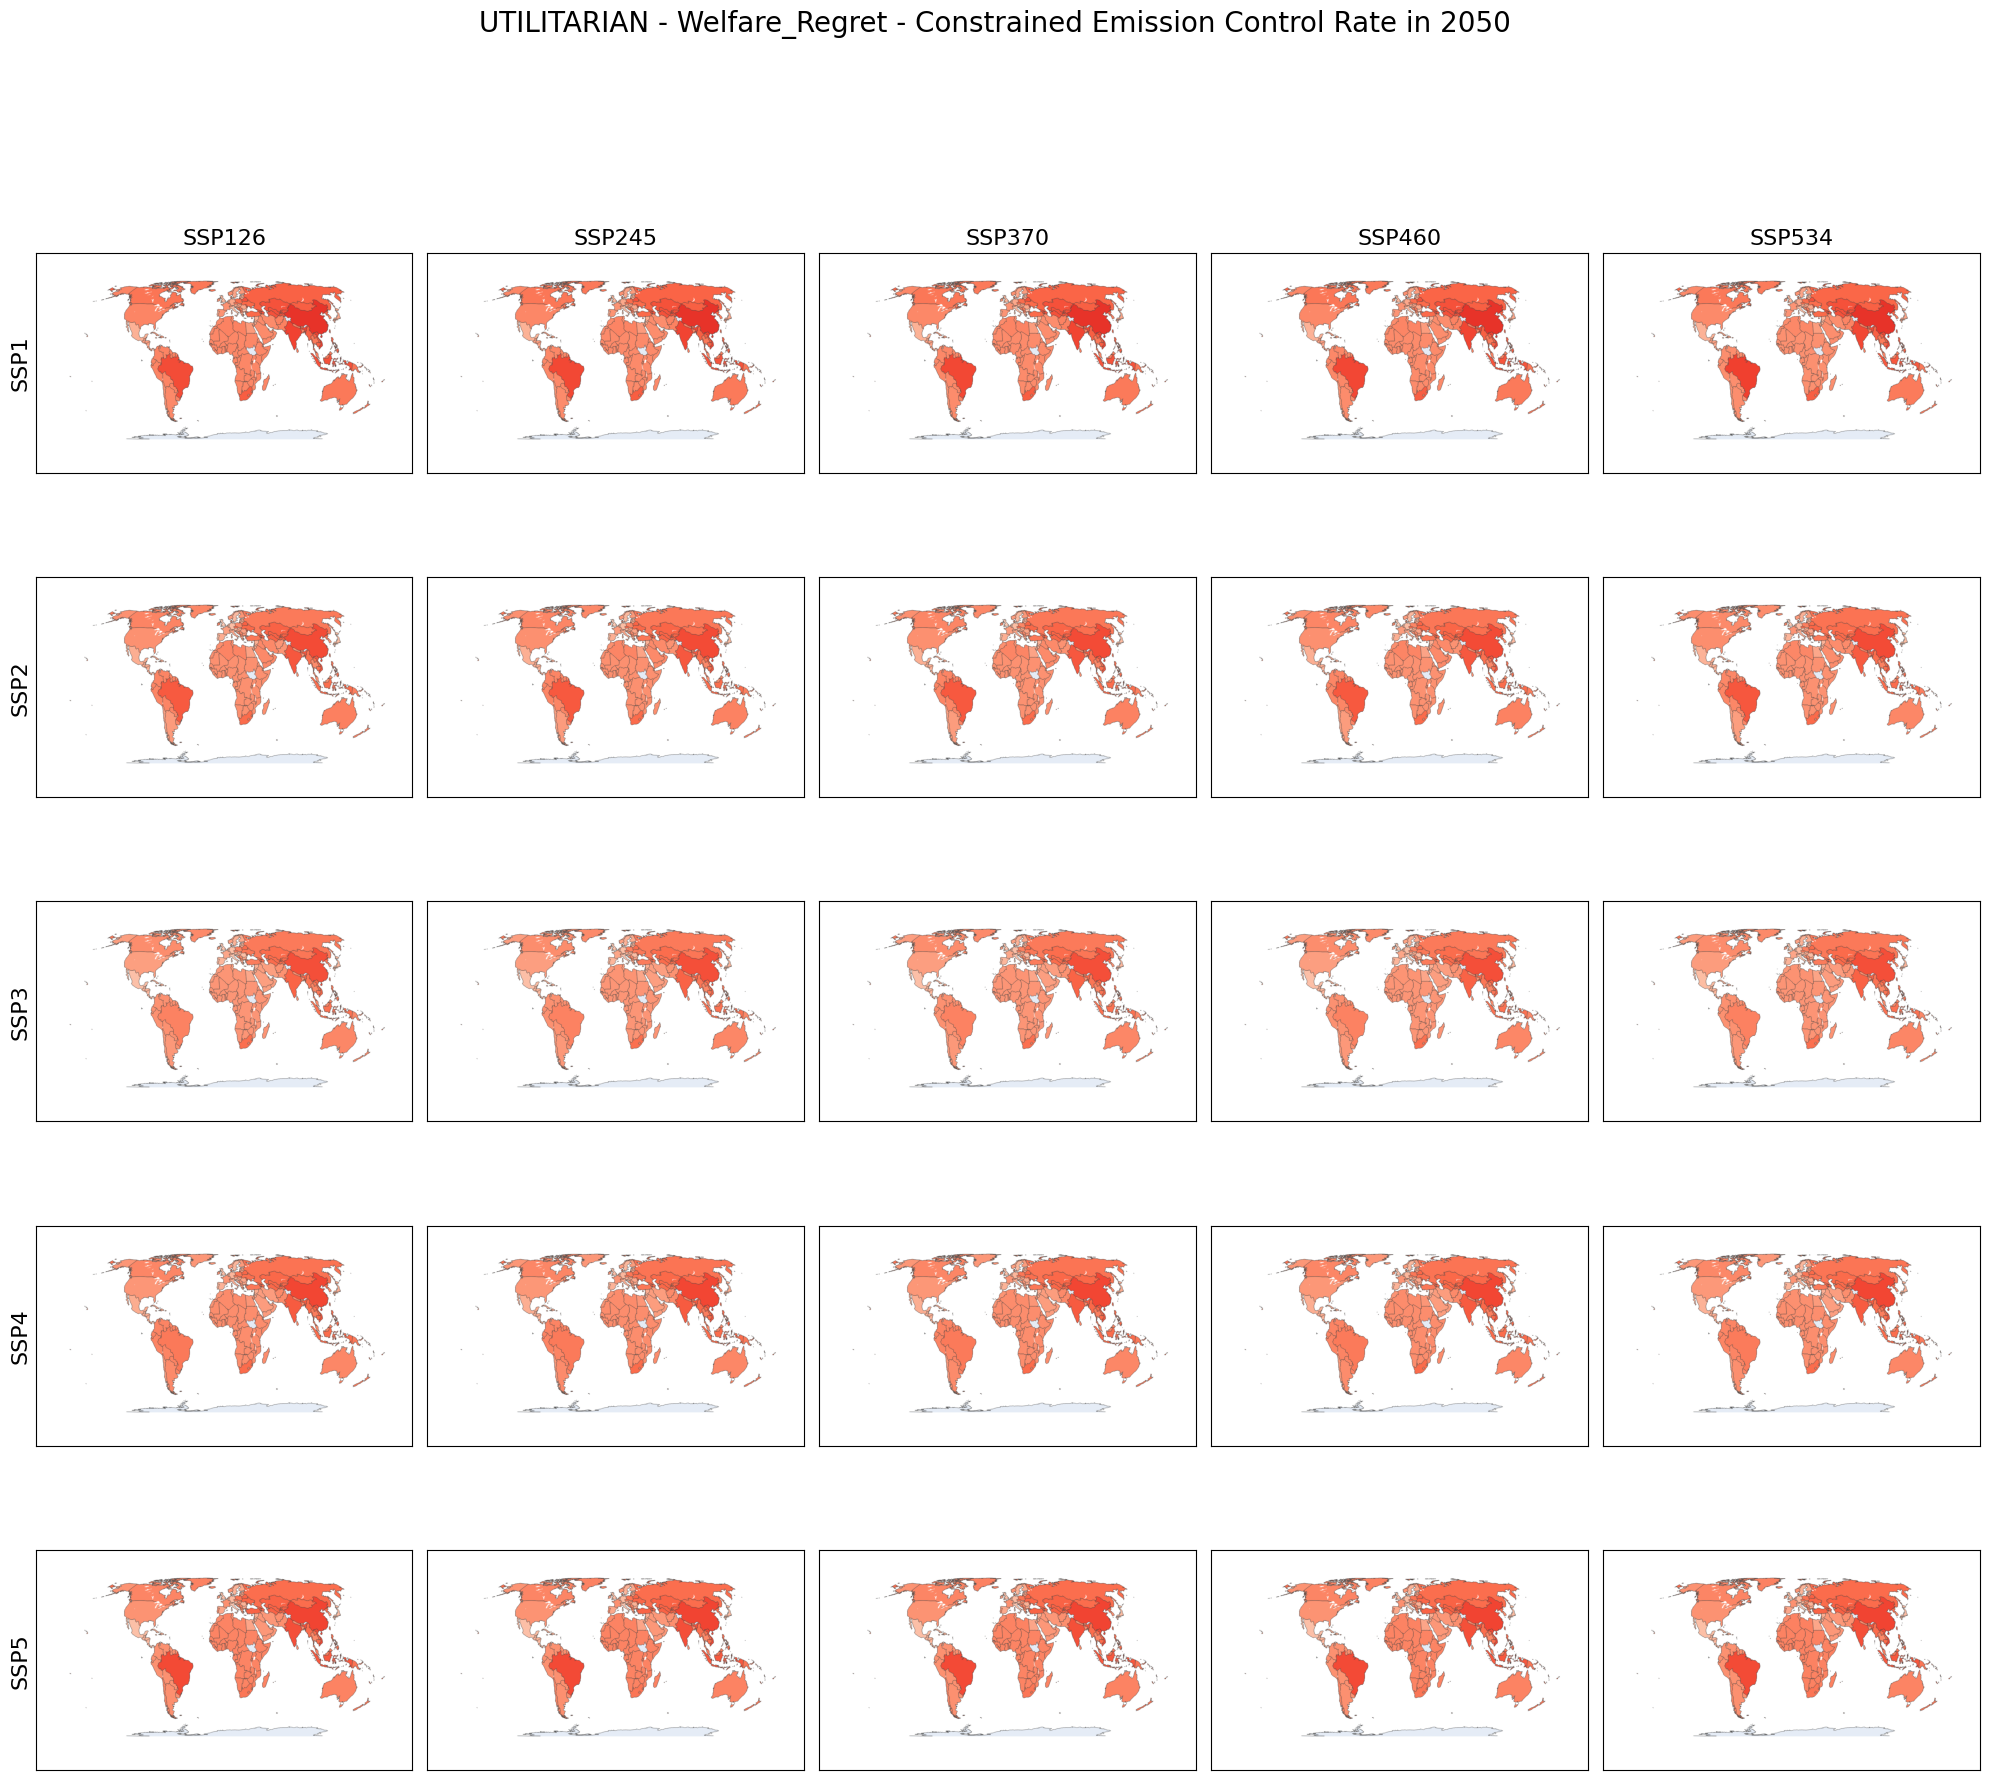

In [9]:
# This code generates a 5x5 grid of choropleth plots.
# Rows correspond to reference_scenarios and columns to ssps.
# We add rotated row labels on the left and keep column labels on top.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import json

regret_type = "Welfare_Regret"  # or "Welfare_Regret" "Temperature_Regret"
ethical_framing = "UTILITARIAN"  # or "UTILITARIAN"

fig, axs = plt.subplots(5, 5, figsize=(20, 20))

# Row labels (left side) correspond to reference scenarios
reference_scenarios = ["SSP1", "SSP2", "SSP3", "SSP4", "SSP5"]
# Column headers (top) correspond to SSPs
ssps = ["SSP126", "SSP245", "SSP370", "SSP460", "SSP534"]

base_path = "data/temporary/NU_DATA/mmBorg/plots/"

# Read the json file with min regret policy indices
with open("data/temporary/NU_DATA/mmBorg/min_regret_policy_indices.json", "r") as f:
    loaded_min_regret_policy_indices = json.load(f)

# Fill the grid with the plots
for i, scenario in enumerate(reference_scenarios):
    for j, ssp in enumerate(ssps):
        policy_index = loaded_min_regret_policy_indices[scenario][ethical_framing][regret_type]
        # Example file name: PRIORITARIAN_ref_SSP1_Welfare_Regret_idx0_SSP534_rate2050.png
        file_name = f"{ethical_framing}_ref_{scenario}_{regret_type}_idx{policy_index}_{ssp}_rate2050.png"
        img_path = os.path.join(base_path, file_name)

        try:
            img = mpimg.imread(img_path)
        except FileNotFoundError:
            print(f"Warning: missing {img_path}")
            continue

        ax = axs[i, j]
        ax.imshow(img)

        # Do not turn the axis completely off; hide only the ticks for a clean look
        ax.set_xticks([])
        ax.set_yticks([])

        # Column headers (SSP names) on the top row
        if i == 0:
            ax.set_title(ssp, fontsize=16)

        # Row labels on the left (will be set below)

# Row labels on the left (rotated 90 degrees by default)
for i, scenario in enumerate(reference_scenarios):
    axs[i, 0].set_ylabel(scenario, fontsize=16)

# Improve layout and give space for left labels
plt.subplots_adjust(left=0.28, right=0.98, top=0.95, bottom=0.08)

# Optional: only show outer labels (keeps the left column labels visible)
for ax in axs.flat:
    ax.label_outer()

plt.suptitle(f"{ethical_framing} - {regret_type} - Constrained Emission Control Rate in 2050", fontsize=20)

# Use tight_layout with a rect to avoid overlapping the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save and display
output_pdf = os.path.join(base_path, f"{ethical_framing}_{regret_type}_constrained_emission_control_rate_2050_matrix.pdf")
plt.savefig(output_pdf)
plt.show()

# Feature Importance Analysis

In [ ]:
from justice.util.feature_importance import build_long_dataframe, run_all_ml_importance

years = (2030, 2040, 2050, 2060, 2070,  2080, 2090, 2100) #(2030, 2050, 2070, 2100),
long_df = build_long_dataframe(
    base_path="data/temporary/NU_DATA/mmBorg/",
    region_mapping_path="data/input/12_regions.json",
    rice_region_dict_path="data/input/rice50_regions_dict.json",
    years_of_interest=years,
)

print("Long DF shape:", long_df.shape)



results = run_all_ml_importance(
    long_df=long_df,
    years=years,
    target_stats=("raw",),
    output_dir="ml_importance_plots",
    cv_folds=5,
    random_state=42,
    model_params=dict(
        depth=6,
        learning_rate=0.05,
        n_estimators=800,
        l2_leaf_reg=3.0,
        loss_function="RMSE",
        random_seed=42,
        od_type="Iter",
        od_wait=50,
        use_best_model=True,
        verbose=False,
        allow_writing_files=False,
    ),
    normalized_plots=True,
    model_type="final",
    scope="global", 
)




Long DF shape: (10410400, 9)
Saving plots to: /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/ml_importance_plots/global/raw
Saving feature importance data to: /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/ml_importance_plots/global/raw/global_2030_shap_full.csv
Saving feature importance data to: /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/ml_importance_plots/global/raw/global_2040_shap_full.csv
Saving feature importance data to: /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/ml_importance_plots/global/raw/global_2050_shap_full.csv
Saving feature importance data to: /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/ml_importance_plots/global/raw/global_2060_shap_full.csv
Saving feature importance data to: /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/ml_importance_plots/global/raw/global_2070_shap_full.csv
Saving feature importance data to: /Users/palokbiswas/Desktop/pollockdevis_git/JUSTICE/ml_importance_plots/global/raw/global_2080_shap_full.csv
Saving 

## Stacked Bar Plots of Feature Importance

In [10]:
from justice.util.visualizer import render_all_grouped_stacked_charts


# render_all_grouped_stacked_charts(
#     base_dir="ml_importance_plots",
#     scope="regional",
#     stat="raw",
#     model_type="final",
#     years=(2030, 2050, 2070, 2100),#(2030, 2040, 2050, 2060, 2070,  2080, 2090, 2100), #(2030, 2050, 2070, 2100),
#     group_map={"Deep Uncertainty": ["Scenario"], "Normative Uncertainty": ["Optimization", "Welfare", "Regret"], "Stochastic Uncertainty": ["Sample"]},
#     output_dir="figs",
# )


render_all_grouped_stacked_charts(
    base_dir="ml_importance_plots",
    scope="global",
    stat="raw",
    model_type="final",
    years=(2030, 2040, 2050, 2060, 2070,  2080, 2090, 2100), #(2030, 2050, 2070, 2100),
    group_map=None, #{"Deep Uncertainty": ["Scenario"], "Normative Uncertainty": ["Optimization", "Welfare", "Regret"], "Stochastic Uncertainty": ["Sample"]},
    output_dir="figs",
)

{'data':    Year  Scenario    Regret   Welfare  Optimization    Sample
 0  2030  0.593274  0.057830  0.100602      0.203194  0.045100
 1  2040  0.472755  0.231374  0.193063      0.064074  0.038735
 2  2050  0.399137  0.219097  0.211700      0.129393  0.040673
 3  2060  0.460422  0.233514  0.193652      0.091670  0.020742
 4  2070  0.471956  0.210437  0.168935      0.127727  0.020945
 5  2080  0.504458  0.175456  0.143217      0.146766  0.030103
 6  2090  0.549459  0.135998  0.118391      0.154815  0.041337
 7  2100  0.592312  0.111174  0.095021      0.159105  0.042388,
 'figure': <Figure size 900x600 with 1 Axes>}

In [ ]:
long_df.head()

,Optimization,Regret,Scenario,Welfare,Region,Year,Sample,AbatedEmission,Scope
0,SSP1,Temperature_Regret,SSP126,UTILITARIAN,Rest of the World,2030,0,0.447325,Regional
1,SSP1,Temperature_Regret,SSP126,UTILITARIAN,Rest of the World,2030,1,0.447762,Regional
2,SSP1,Temperature_Regret,SSP126,UTILITARIAN,Rest of the World,2030,2,0.449517,Regional
3,SSP1,Temperature_Regret,SSP126,UTILITARIAN,Rest of the World,2030,3,0.447558,Regional
4,SSP1,Temperature_Regret,SSP126,UTILITARIAN,Rest of the World,2030,4,0.448138,Regional


# Ternary and Choropleth Maps

In [ ]:
from justice.util.visualizer import generate_uncertainty_visualizations

if __name__ == "__main__":
    base_dir = "ml_importance_plots"
    region_mapping_path = "data/input/12_regions.json"
    fig_map, results = generate_uncertainty_visualizations(
        base_dir=base_dir,
        region_mapping_path=region_mapping_path,
        stat="raw",
        model_type="final",
        years=(2030, 2050, 2070, 2100),
        ternary_scale=8,
        quantize=True,
        annotate_points=False,
        marker_size=18,
        jitter_strength=0.05,
        random_state=0,
        output_dir="figs",
    )
    print("Saved figures:", results)
    fig_map.show()

Saved figures: {2030: {'ternary': PosixPath('figs/ternary_2030.png'), 'choropleth': PosixPath('figs/choropleth_2030.svg')}, 2050: {'ternary': PosixPath('figs/ternary_2050.png'), 'choropleth': PosixPath('figs/choropleth_2050.svg')}, 2070: {'ternary': PosixPath('figs/ternary_2070.png'), 'choropleth': PosixPath('figs/choropleth_2070.svg')}, 2100: {'ternary': PosixPath('figs/ternary_2100.png'), 'choropleth': PosixPath('figs/choropleth_2100.svg')}}
